# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

## Agenda

1. Data Validation
    1. Inspecting each column
        - recipe
            - We can see that recipe is a column which consists of id's for every recipe. Every id is unique
            - It starts at Index 1 and ends at index 947
        - calories
            - 895/947 non null values
            - Multiple possibilities how to get missing values if necessary for now it's just noticed
            - since calories are pretty specific there is are at most 2 entries for the same calory count
            - It seems like all nutritients have 895 values
            - In the histplot we can see that the data is pretty left skewed
            - The min value is 0.14 and the max value 3633.16
        - carbohydrate
            - data is left skewed 
            - contains somewhat reasonable values
        - sugar
            - 71.59% of recipes contain 10g sugar or less which indicates that most recipes are rather healthy
            - Depending on the group reached that can be an important feature
            - Data is left skewed
            - Mean: 9.04, Median: 4.55, Min: 0.01, Max: 148.75
        - protein
            - Mean: 24.14, Median: 10.8, Min: 0.0, Max: 363.36
            - Data is left skewed
            - Probably a recipe with more protein is more desirable
        - category
            - Most recipes are for desserts
            - Pretty meat heavy recipes
        - servings
            - Data should be cleaned since "4 as a snack" should be 4
            - Most recipes are for 4 people. I guess it's because a family consists on average out of 4 people
        - high_traffic
            - Only High or Null so it's either true or not
            - Should be converted to 1 (True) or 0 (False)
    2. Data Cleaning
        1. First we clean high_traffic
            - NaN is converted to 0 and "High" to 1
        2. Clean servings
            - remove unnecessary chars and convert column to numeric
        3. Nutritients 
            - around 52 rows have NaN values for all nutritients
            - 2 options either we fill them with the median value of the corresponding category or we delete them
            - We use the median and not the mean since there are heavy outliers for each category
            - Since the grading says that lines shouldn't be deleted I will fill them with the mean values
            - It won't be 100% accurate, but that's oke, since e.g. a dish with pork should have somewhat the same protein as another pork dish as long as the servings are the same.
            - So we will calculate the mean for each category for 1 serving and scale it to the approproate servings provided in the recipe
        4. Every column has now no nan values
2. Exploratory Analysis
    1. Box plot of all nutrients and one box plot for calories
    2. Scatter plot for calories with all nutrients
    3. Scatter plot to compare nutrients with nutrients
    - I thought the correlation between sugar and carbohydrates would be higher, but I guess that's because there are a lot of dishes with less than 10g sugar 
    - We have a correlation which is not too big, but it's present between protein per serving and the calories
3. Model Development

General Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
---------------------------------------------------
recipe
---------------------------------------------------
calories
Mean, Median, Min, Max
435.9391955307263 288.55 0.14 3633.16


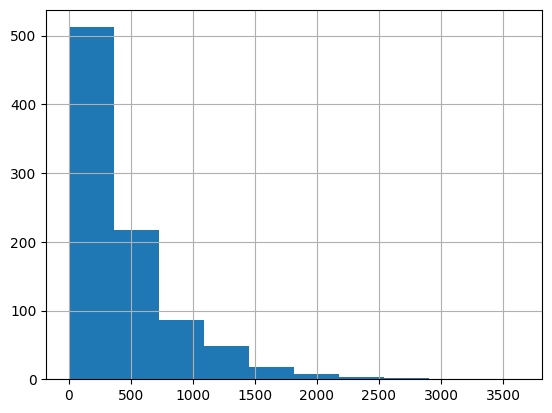

---------------------------------------------------
carbohydrate
Mean, Median, Min, Max
35.06967597765363 21.48 0.03 530.42


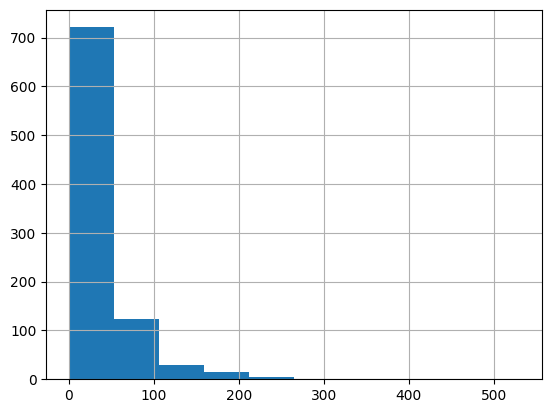

---------------------------------------------------
sugar
71.59% of recipes contain 10g sugar or less
Mean, Median, Min, Max
9.04654748603352 4.55 0.01 148.75


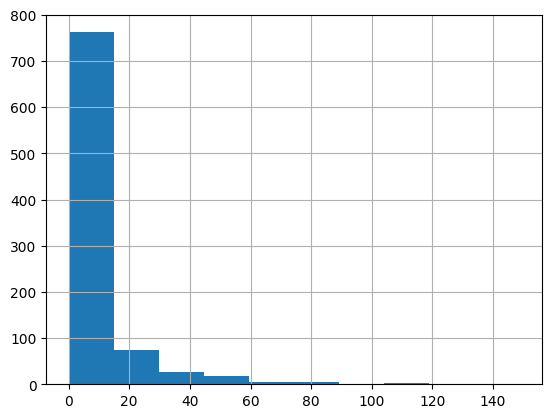

---------------------------------------------------
protein
Mean, Median, Min, Max
24.149296089385476 10.8 0.0 363.36


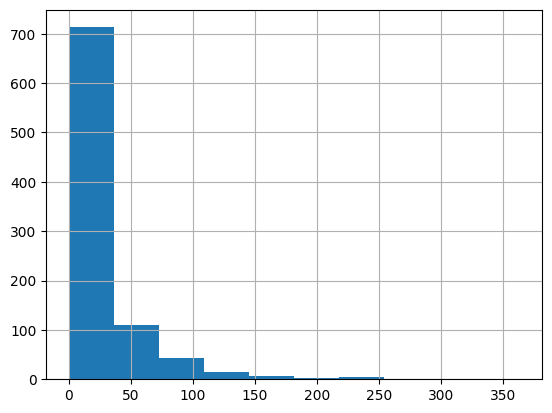

---------------------------------------------------
category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64


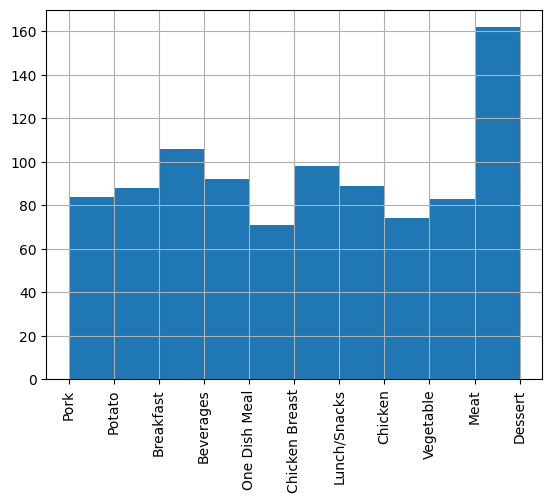

---------------------------------------------------
servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64


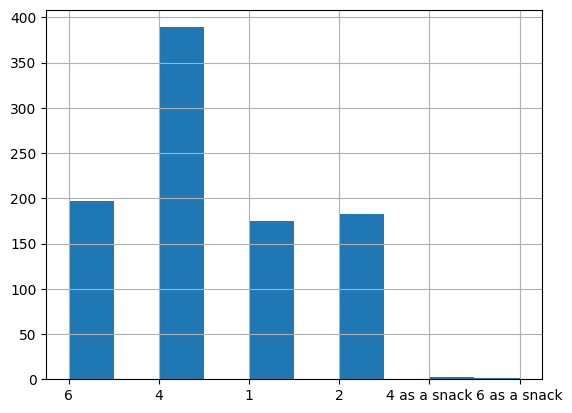

---------------------------------------------------
high_traffic
High    574
Name: high_traffic, dtype: int64


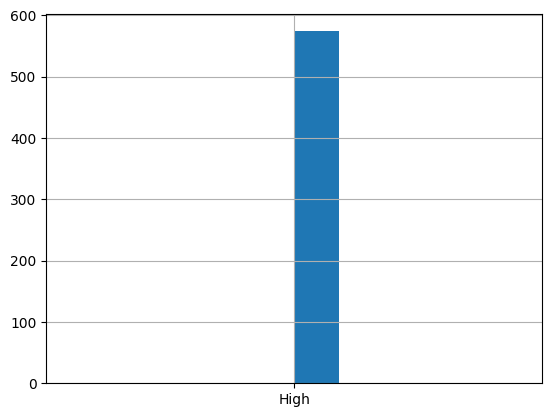

---------------------------------------------------
Grouped Categories columns: Index(['calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving',
       'protein_per_serving'],
      dtype='object')
Grouped Categories index: Index(['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', 'Dessert',
       'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'],
      dtype='object', name='category')
144.0175
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(

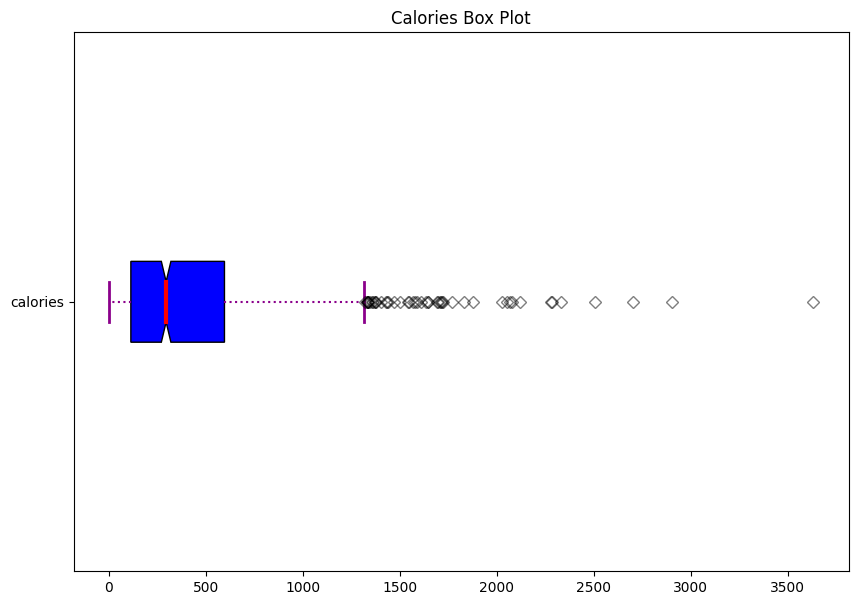

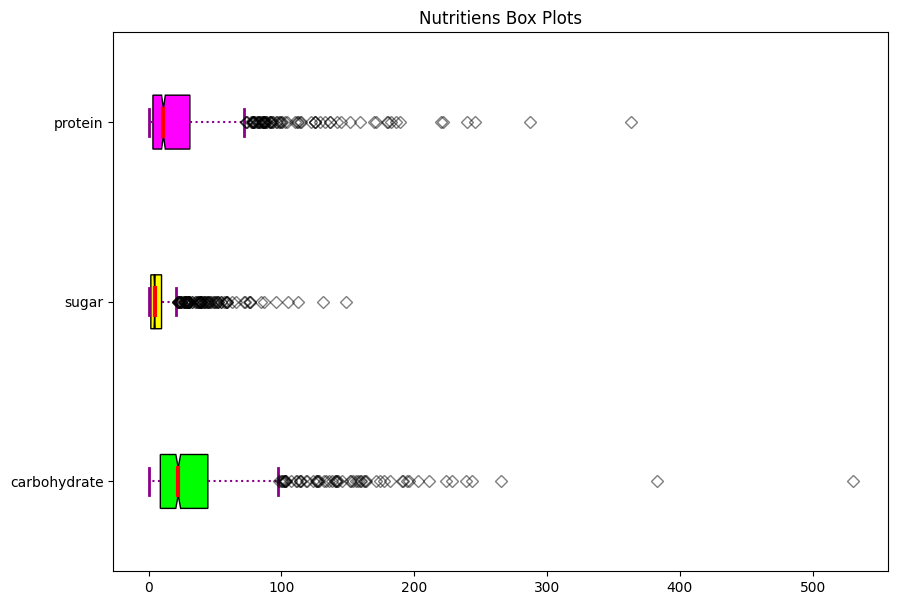

Calories compared to nutrients


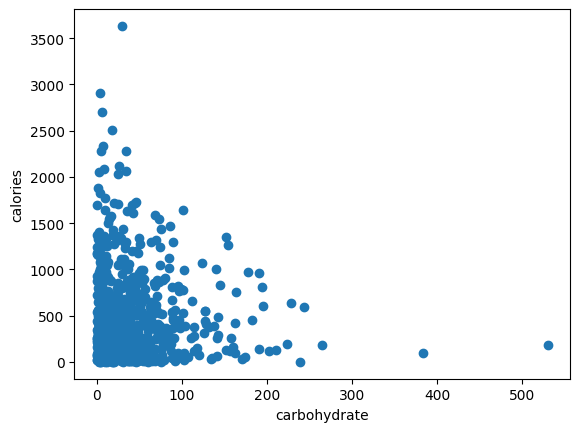

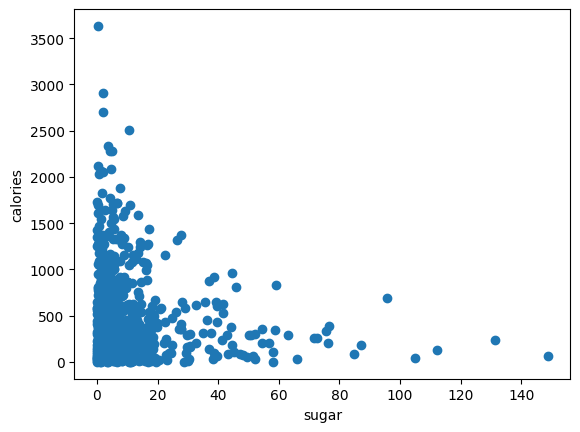

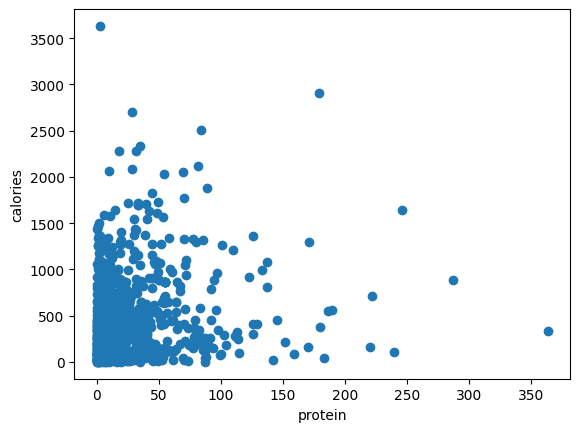

Nutrients with nutrients


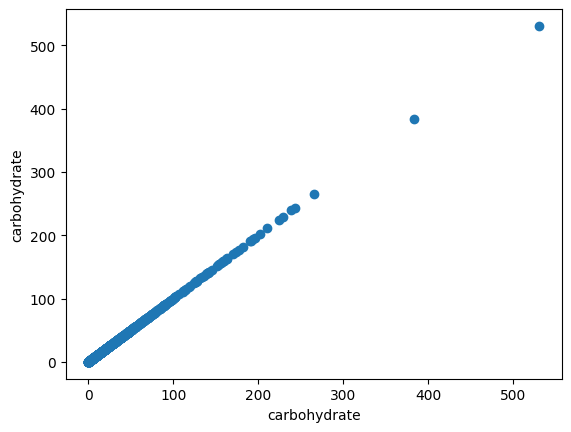

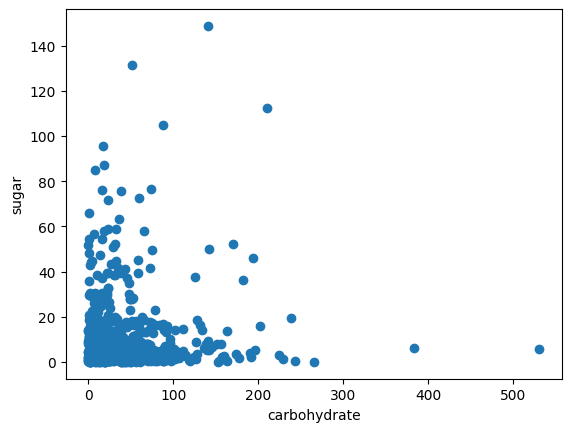

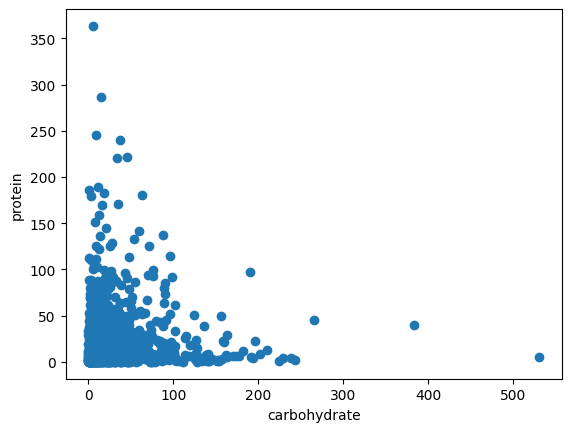

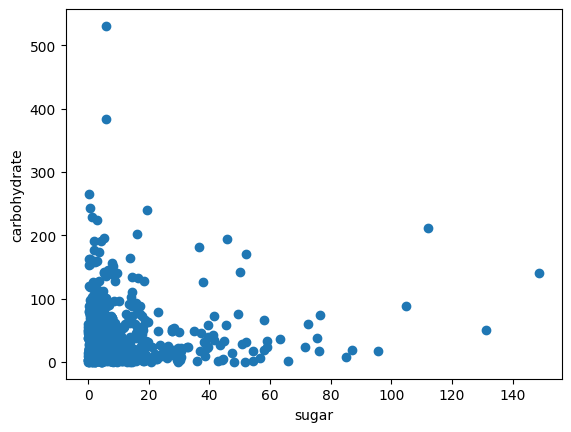

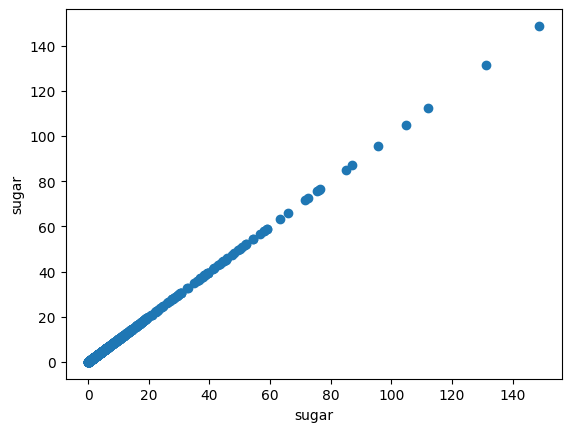

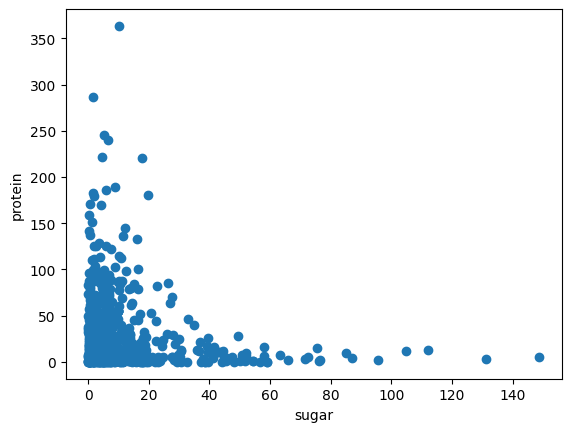

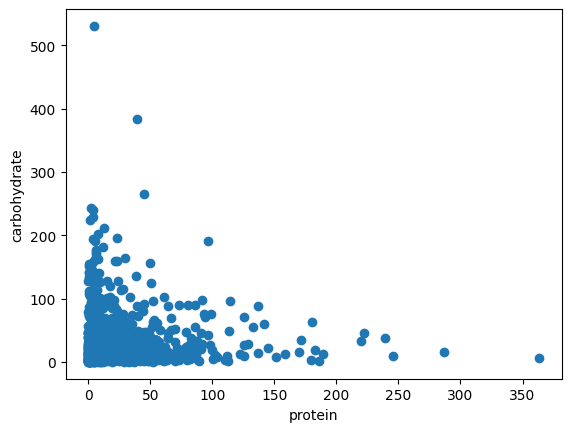

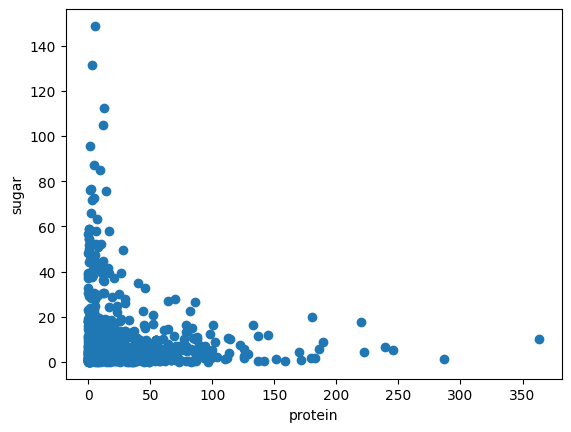

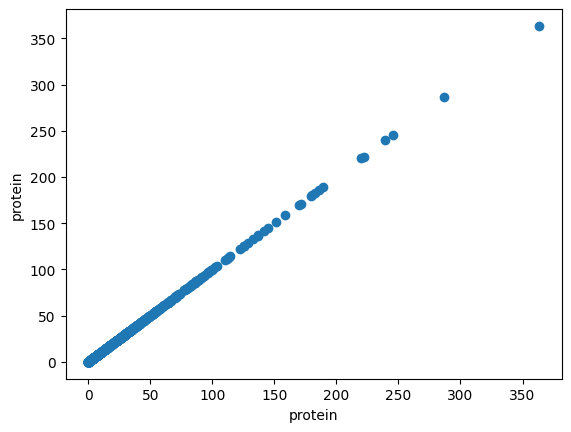

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving
recipe,1.000000,0.012920,0.044743,-0.027489,-0.058767,0.029660,0.028159,-0.031496,0.021465,-0.013928,-0.053543
calories,0.012920,1.000000,-0.028970,-0.097302,0.172477,-0.034756,0.074382,0.717184,-0.000409,-0.072188,0.149821
carbohydrate,0.044743,-0.028970,1.000000,0.073922,-0.042795,-0.017895,0.080932,-0.016726,0.738994,0.057017,-0.018562
sugar,-0.027489,-0.097302,0.073922,1.000000,-0.099053,-0.008617,-0.075527,-0.081411,0.058341,0.789608,-0.094691
protein,-0.058767,0.172477,-0.042795,-0.099053,1.000000,-0.017926,0.044575,0.116078,-0.009256,-0.075597,0.754696
servings,0.029660,-0.034756,-0.017895,-0.008617,-0.017926,1.000000,0.048708,-0.447794,-0.381553,-0.276672,-0.367724
high_traffic,0.028159,0.074382,0.080932,-0.075527,0.044575,0.048708,1.000000,0.050761,0.061305,-0.058915,0.030261
calories_per_serving,-0.031496,0.717184,-0.016726,-0.081411,0.116078,-0.447794,0.050761,1.000000,0.194740,0.050738,0.339577
carbohydrate_per_serving,0.021465,-0.000409,0.738994,0.058341,-0.009256,-0.381553,0.061305,0.194740,1.000000,0.201470,0.167274
sugar_per_serving,-0.013928,-0.072188,0.057017,0.789608,-0.075597,-0.276672,-0.058915,0.050738,0.201470,1.000000,0.011700


In [9]:
# 1
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
#read data 
df = pd.read_csv("recipe_site_traffic_2212.csv")

# Check data for length and data types
# We can see that most data is given and is not null
print("General Information")
df.info()
print("---------------------------------------------------")

# Analyzing every column
# recipe
print("recipe")
df["recipe"].value_counts()
# We can see that recipe is a column which consists of id's for every recipe. Every id is unique
#df["recipe"].hist()
df["recipe"].max(), df["recipe"].min()
print("---------------------------------------------------")

# calories
print("calories")
df["calories"].value_counts()
print("Mean, Median, Min, Max")
print(df["calories"].mean(),df["calories"].median(),df["calories"].min(),df["calories"].max())
df["calories"].hist(bins=10)
plt.show()
print("---------------------------------------------------")

# carbohydrate
print("carbohydrate")
df["carbohydrate"].value_counts()
print("Mean, Median, Min, Max")
print(df["carbohydrate"].mean(),df["carbohydrate"].median(),df["carbohydrate"].min(),df["carbohydrate"].max())
df["carbohydrate"].hist(bins=10)
plt.show()
print("---------------------------------------------------")

# sugar
print("sugar")
df["sugar"].value_counts()
print(f"{len(df[df.sugar <= 10])/len(df)*100:.2f}% of recipes contain 10g sugar or less")
print("Mean, Median, Min, Max")
print(df["sugar"].mean(),df["sugar"].median(),df["sugar"].min(),df["sugar"].max())
df["sugar"].hist(bins=10)
plt.show()
print("---------------------------------------------------")


# protein
print("protein")
df["protein"].value_counts()
print("Mean, Median, Min, Max")
print(df["protein"].mean(),df["protein"].median(),df["protein"].min(),df["protein"].max())
df["protein"].hist(bins=10)
plt.show()
print("---------------------------------------------------")


# category
print("category")
print(df["category"].value_counts())
df["category"].hist(bins=10)
plt.xticks(rotation=90)
plt.show()
print("---------------------------------------------------")


# servings
print("servings")
print(df["servings"].value_counts())
df["servings"].hist(bins=10)
plt.show()
print("---------------------------------------------------")


# high_traffic
print("high_traffic")
print(df["high_traffic"].value_counts())
df["high_traffic"].hist(bins=10)
plt.show()
print("---------------------------------------------------")



# Data Cleaning

# high_traffic
df["high_traffic"] = np.where(df["high_traffic"] == "High", 1, 0)
df["high_traffic"].value_counts()

# servings
servings_converter = lambda x: x if x.isnumeric() else x[0]
df["servings"] = df.servings.map(servings_converter, na_action='ignore')
df.servings = pd.to_numeric(df.servings)
df.servings


# nutritients

df[df.calories.isna() == True]

df[df.calories.isna() == False]

nutritient_columns_per_serving = ["category"]
df_copy = df.copy()
for column in ["calories", "carbohydrate", "sugar", "protein"]:
    result = []
    for index,value in enumerate(df[column]):
        if value:
            result.append(value/df.servings.iloc[index])
        else:
            result.append(None)
    df_copy[f"{column}_per_serving"] = result
    nutritient_columns_per_serving.append(f"{column}_per_serving")
    
grouped_categories = df_copy[nutritient_columns_per_serving].groupby("category")
categories_mean = grouped_categories.agg("median")
print(f"Grouped Categories columns: {categories_mean.columns}")
print(f"Grouped Categories index: {categories_mean.index}")

# Test for pork
print(categories_mean.loc["Pork"]["calories_per_serving"])


for column in ["calories", "carbohydrate", "sugar", "protein"]:
    for index,value in enumerate(df[column]):
        #print(value, index, type(value))
        if math.isnan(value):
            #print(True)
            df[column].iloc[index] = df["servings"].iloc[index] * categories_mean.loc[df["category"].iloc[index]][f"{column}_per_serving"]
            #print(df["servings"].iloc[index] * grouped_categories.loc[df["category"].iloc[index]][f"{column}_per_serving"])
print(df.info())

# creating calories box plot
data = df.calories

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['calories'])

# Adding title 
plt.title("Calories Box Plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()


# Creating plot
data = [df.carbohydrate, df.sugar, df.protein]
 
    
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#00FF00', 
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['carbohydrate', 
                    'sugar', 'protein'])

# Adding title 
plt.title("Nutritiens Box Plots")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()


data = [df.carbohydrate, df.sugar, df.protein]
print("Calories compared to nutrients")
for x_data in data:
    plt.scatter(x_data, df.calories)
    plt.xlabel(x_data.name)
    plt.ylabel("calories")
    plt.show()

print("Nutrients with nutrients")
for x_data in data:
    for y_data in data:
        plt.scatter(x_data, y_data)
        plt.xlabel(x_data.name)
        plt.ylabel(y_data.name)
        plt.show()
        
df.corr()     

df_copy.corr()

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation